In [1]:
#reading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading dataset
df1=pd.read_csv("processed_data.csv")
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
# shows relationship b/w columns
df1.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [5]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
enc=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
     'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 
     'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [7]:
df2=df1.copy()

In [8]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#converting Categorical 'text' data into Categorical 'numeric' data - ex: yes -> 1 and no->0
for cols in enc:
    le=LabelEncoder()
    df2[cols]=le.fit_transform(df2[cols])

In [10]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [11]:
# shows relationship b/w columns
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<Axes: >

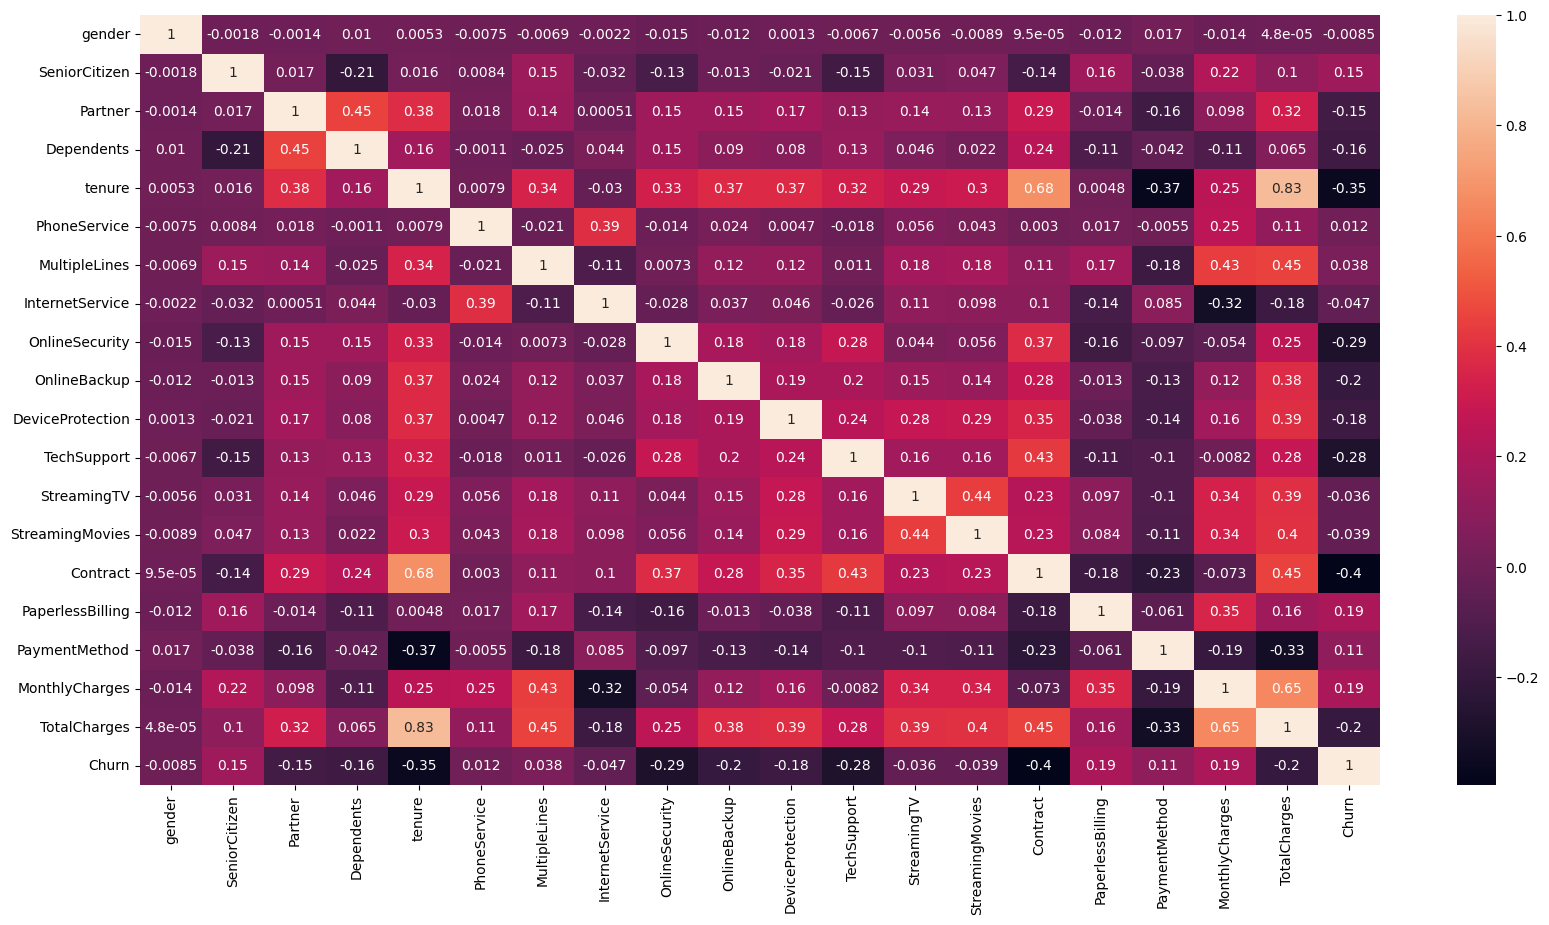

In [12]:
#visualizing the relationship b/w columns using Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True) #annot=True give values on heatmap

In [13]:
# displaying correlation with only Churn column
df2.corr()['Churn']

gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService    -0.047097
OnlineSecurity     -0.289050
OnlineBackup       -0.195290
DeviceProtection   -0.177883
TechSupport        -0.282232
StreamingTV        -0.036303
StreamingMovies    -0.038802
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

In [14]:
# columns that have weak relationship with Churn (target) Column
# gender             -0.008545
# PhoneService        0.011691
# MultipleLines       0.038043
# InternetService    -0.047097
# StreamingTV        -0.036303
# StreamingMovies    -0.038802

In [15]:
X=df2.iloc[:,:-1]
y=df2['Churn']

In [16]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7028,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7029,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7030,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [17]:
dt=DecisionTreeClassifier() #calling model into dt

In [18]:
dt.fit(X,y) #fitting the model

DecisionTreeClassifier()

In [19]:
dt.feature_names_in_ # returns the features

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [20]:
dt.feature_importances_     #return array containing the values that shows each features importance.
                            # Higher the value Higher the importance

array([0.0268388 , 0.02072532, 0.01659926, 0.02239381, 0.11379697,
       0.00205541, 0.01808826, 0.02822735, 0.04532528, 0.01165558,
       0.01711459, 0.01664993, 0.01017613, 0.01127573, 0.16930023,
       0.01813191, 0.04058104, 0.19087914, 0.22018525])

In [21]:
lr=LogisticRegression(max_iter=100) #calling the model
rfe=RFE(lr,n_features_to_select=8)
fit=rfe.fit(X,y)
fit.support_ # tells whether it supports the features are not

array([False,  True, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False, False,
       False])

In [22]:
ext=ExtraTreesClassifier()
ext.fit(X,y)

ExtraTreesClassifier()

In [23]:
ext.feature_importances_

array([0.0375159 , 0.02578573, 0.0296507 , 0.02474725, 0.14929647,
       0.00653105, 0.02649724, 0.04184297, 0.04413056, 0.03224604,
       0.02741574, 0.03817847, 0.02340518, 0.02394104, 0.08100187,
       0.03180715, 0.06447241, 0.1379271 , 0.15360713])

In [24]:
#dropping these columns based on correlation and feature selection models
df3=df2.drop(['gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'],axis=1)

In [25]:
df3

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50,0
7028,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90,0
7029,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45,0
7030,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60,1


In [26]:
# Logistic Regression
# Decision Tree
# RandomForest
# XGBoost
# SVM
# KNN
# AdaBoost
# BaggingClassifier

In [27]:
#taking feature and target
features=df3.drop('Churn',axis=1)
target=df3['Churn']

In [28]:
features.head(2)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50


In [29]:
target.head(2)

0    0
1    0
Name: Churn, dtype: int32

# Standard Scaler

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
features=ss.fit_transform(features)

In [31]:
features

array([[-0.44032709,  1.03561683, -0.65230493, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.26087792, -0.17373982],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-0.44032709,  1.03561683,  1.53302536, ...,  0.39980518,
        -1.17000405, -0.85451414],
       [ 2.27103902,  1.03561683, -0.65230493, ...,  1.33663626,
         0.31916782, -0.87209546],
       [-0.44032709, -0.9656081 , -0.65230493, ..., -1.47385696,
         1.35793167,  2.01234407]])

In [32]:
# diving the features and target into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0)

In [33]:
# seeing the size of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5625, 13)
(5625,)
(1407, 13)
(1407,)


In [34]:
# calling the model and fitting the data
lg_m=LogisticRegression()
lg_m.fit(X_train,y_train)

LogisticRegression()

In [35]:
# predicting train set output
pred_tr=lg_m.predict(X_train)
pred_tr

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# making predictions on test set
pred_lg=lg_m.predict(X_test)

In [37]:
pred_lg

array([0, 0, 0, ..., 1, 0, 1])

In [38]:
# evaluation metrics for verifying model accuracy during training
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,pred_tr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4125
           1       0.65      0.54      0.59      1500

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.79      5625



In [39]:
# evaluation metrics for verifying model accuracy during testing
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.64      0.53      0.58       369

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [40]:
# CHecking if target variable data is balanced or not
df3['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [41]:
# Balancing imbalanced data
from imblearn.over_sampling import SMOTE

In [42]:
# Balancing imbalanced data
X_resample,Y_resample = SMOTE(random_state=0).fit_resample(features,target)

In [43]:
X_resample

array([[-0.44032709,  1.03561683, -0.65230493, ...,  0.39980518,
        -1.16169394, -0.99419409],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.26087792, -0.17373982],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -0.36392329, -0.95964911],
       ...,
       [-0.44032709,  1.03561683,  1.53302536, ..., -1.47385696,
        -1.08773662, -0.84543954],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  1.33663626,
        -1.51028463, -0.9988208 ],
       [-0.44032709, -0.9656081 , -0.65230493, ...,  0.14056981,
         1.08226405, -0.83159974]])

In [44]:
Y_resample.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [45]:
# splitting balanced data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X_resample,Y_resample,test_size=0.2,random_state=0)

In [46]:
# seeing the size of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8260, 13)
(8260,)
(2066, 13)
(2066,)


In [47]:
# calling the model and fitting the data
lr1=LogisticRegression()
lr1.fit(X_train,y_train)

LogisticRegression()

In [48]:
# making predictions on test set
pred_lr1=lr1.predict(X_test)
pred_lr1

array([0, 0, 1, ..., 1, 1, 0])

In [49]:
# evaluation metrics for verifying model accuracy during testing
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1006
           1       0.76      0.83      0.80      1060

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [50]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
pred_rf=rf.predict(X_test)
pred_rf

array([0, 1, 0, ..., 0, 0, 1])

In [52]:
# evaluation metrics for verifying model accuracy during testing
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1006
           1       0.86      0.85      0.85      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



# Cross Validation Technique

In [53]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=10)
model1=LogisticRegression()
result=cross_val_score(model1,X_resample,Y_resample,cv=kfold)

In [54]:
result

array([0.72700871, 0.74346563, 0.75314618, 0.71926428, 0.71732817,
       0.73668925, 0.75968992, 0.77906977, 0.77131783, 0.79457364])

In [55]:
print('mean',result.mean())
print('std',result.std())

mean 0.7501553389315384
std 0.024800138770756024


In [56]:
model2=RandomForestClassifier()
result2=cross_val_score(model2,X_resample,Y_resample,cv=kfold)
print(result2)
print(result2.mean())
print(result2.std())

[0.80445305 0.81316554 0.80154889 0.78025169 0.7821878  0.80929332
 0.83430233 0.92829457 0.91569767 0.92829457]
0.8397489437703085
0.05715855770623953


In [57]:
models=[]
models.append(("Lr",LogisticRegression()))
models.append(("RF_Gini",RandomForestClassifier()))
models.append(("RF_Entropy",RandomForestClassifier(criterion='entropy')))
models.append(("KNN",KNeighborsClassifier()))
models.append(("NB",GaussianNB()))
models.append(("XGB",XGBClassifier()))
models.append(("BGC",BaggingClassifier()))
models.append(("SVC",SVC()))
models.append(("ADB",AdaBoostClassifier()))

In [58]:
models

[('Lr', LogisticRegression()),
 ('RF_Gini', RandomForestClassifier()),
 ('RF_Entropy', RandomForestClassifier(criterion='entropy')),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)),
 ('BGC', BaggingCla

In [59]:
names=[]
result=[]
score='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10)
    cv_result=cross_val_score(model,X_resample,Y_resample,cv=kfold,scoring=score)
    names.append(name)
    result.append(cv_result)
    msg='%s: %f (%f)' % (name,cv_result.mean(),cv_result.std())
    print(msg)

Lr: 0.750155 (0.024800)
RF_Gini: 0.838393 (0.055738)
RF_Entropy: 0.837232 (0.057871)
KNN: 0.777097 (0.066870)
NB: 0.748133 (0.050682)
XGB: 0.832396 (0.073943)
BGC: 0.807204 (0.041389)
SVC: 0.756066 (0.033914)
ADB: 0.793166 (0.051454)


We finalize the algorithm : Random Forest =  RF: 0.836069 (0.058330)

In [60]:
from sklearn.ensemble import RandomForestClassifier


kfold = KFold(n_splits=10)
model_RF = RandomForestClassifier()

results = cross_val_score(model_RF, X_resample, Y_resample, cv=kfold)

print("Average Accuracy",results.mean())
print("SD ",results.std())
print(results.min(),results.max())

Average Accuracy 0.8369405547175758
SD  0.05814278836041759
0.7686350435624395 0.9302325581395349
